In [2]:
import sys
sys.path.append('../')
import src.Auth as Auth
import numpy as np

### 2D MAC 

structering the Messages in a 2D array and calculating the tags for each column and each row.

In [5]:
m_nr,t_nr = Auth.X.shape
probability_of_success_message = .9
probability_of_success_tag = 1

m = np.array([probability_of_success_message]*m_nr)
t = np.array([probability_of_success_tag]*t_nr)

A = Auth.validate(Auth.X,m,t)

print("A = ")
print(np.round(A,3).reshape(6,-1))

L = Auth.Latency(X=Auth.X,m=np.ones(m_nr),t=np.ones(t_nr))
print("L = ")
print(np.round(L,3).reshape(6,-1))

A = 
[[1.26 1.26 1.26]
 [1.26 1.26 1.26]
 [1.26 1.26 1.26]
 [1.26 1.26 1.26]
 [1.26 1.26 1.26]
 [1.26 1.26 1.26]]
L = 
[[2 1 0]
 [2 1 0]
 [2 1 0]
 [2 1 0]
 [2 1 0]
 [2 1 0]]


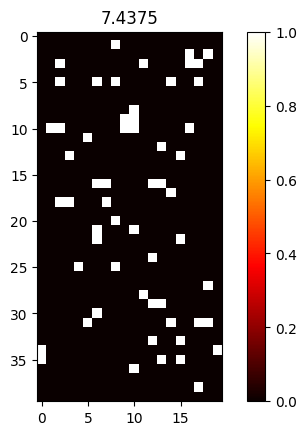

In [22]:
import matplotlib.pyplot as plt

probability_of_success_message = .5
probability_of_success_tag = 1

for i in range(1):

    m_nr,t_nr = 40,20
    p_fill_Xs = np.linspace(0.1,0.99,13000)
    As = []
    Xs = []
    for p_fill_X in p_fill_Xs:
        X = Auth.random_binary_array(shape = (m_nr,t_nr), probability_of_one = p_fill_X)
        m = np.array([probability_of_success_message]*m_nr)
        t = np.array([probability_of_success_tag]*t_nr)
        A = Auth.validate(X,m,t)
        L = Auth.Latency(X,np.ones(m_nr),np.ones(t_nr))

        As.append(np.sum(A))#- sum(L))
    
        Xs.append(X)

    # plt.plot(p_fill_Xs,As)
    # plt.show()

    plt.imshow(Xs[np.argmax(As)], cmap= 'hot', interpolation='nearest')
    plt.colorbar()
    plt.title('{}'.format(As[np.argmax(As)]))
    plt.show()

